In [13]:
import os
from copy import deepcopy
from glob import glob

import matplotlib.pyplot as plt
import mne
import numpy as np
import pandas as pd
from data_utils import load_Koenig_microstate_templates
from eeg_recording import SingleSubjectRecording
from plotting import plot_eeg_topomaps
from tqdm import tqdm
from utils import run_in_parallel

plt.style.use("papers")
# mne.set_log_level("warning")

MODALITY = "EC"
DATA_FOLDER = "../../data/test_data_LEMON/"
VAR_FOLDER = "../../data/LEMON_VAR_data/"

DATA_CROP = 60.0  # 1 minute

USE_GFP = True
DATA_FILTER = [2.0, 20.0]
NO_STATES = 4

In [2]:
recordings_data = []

for file in tqdm(sorted(glob(DATA_FOLDER + f"*{MODALITY}*.set"))):
    subject_id = os.path.basename(file).split(".")[0]
    subject_id += "_1st_minute"
    mne_data = mne.io.read_raw_eeglab(file, preload=True)
    mne_data.crop(tmax=DATA_CROP)
    recordings_data.append(SingleSubjectRecording(subject_id=subject_id, data=mne_data))

for file in tqdm(sorted(glob(DATA_FOLDER + f"*{MODALITY}*.set"))):
    subject_id = os.path.basename(file).split(".")[0]
    subject_id += "_2nd_minute"
    mne_data = mne.io.read_raw_eeglab(file, preload=True)
    mne_data.crop(tmin=DATA_CROP, tmax=2 * DATA_CROP)
    recordings_data.append(SingleSubjectRecording(subject_id=subject_id, data=mne_data))


recordings_var = []
for file in tqdm(sorted(glob(VAR_FOLDER + "*.fif"))):
    subject_id = os.path.basename(file).split(".")[0]
    mne_data = mne.io.read_raw(file, preload=True)
    recordings_var.append(SingleSubjectRecording(subject_id=subject_id, data=mne_data))

  0%|                                                                                                                                                                                | 0/16 [00:00<?, ?it/s]

Reading /Users/nikola/work-brain/eeg_microstate_and_latent_space/notebooks/VAR stuff/../../data/test_data_LEMON/sub-010002_EC.fdt
Reading 0 ... 119344  =      0.000 ...   477.376 secs...


/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_62246/4045715948.py:6: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  mne_data = mne.io.read_raw_eeglab(file, preload=True)
/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_62246/4045715948.py:6: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  mne_data = mne.io.read_raw_eeglab(file, preload=True)
  6%|██████████▌                                                                                                                                                             | 1/16 [00:00<00:01,  7.79it/s]

Reading /Users/nikola/work-brain/eeg_microstate_and_latent_space/notebooks/VAR stuff/../../data/test_data_LEMON/sub-010003_EC.fdt
Reading 0 ... 119515  =      0.000 ...   478.060 secs...


/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_62246/4045715948.py:6: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  mne_data = mne.io.read_raw_eeglab(file, preload=True)
/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_62246/4045715948.py:6: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  mne_data = mne.io.read_raw_eeglab(file, preload=True)
 12%|█████████████████████                                                                                                                                                   | 2/16 [00:00<00:01,  7.92it/s]

Reading /Users/nikola/work-brain/eeg_microstate_and_latent_space/notebooks/VAR stuff/../../data/test_data_LEMON/sub-010004_EC.fdt
Reading 0 ... 119277  =      0.000 ...   477.108 secs...


/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_62246/4045715948.py:6: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  mne_data = mne.io.read_raw_eeglab(file, preload=True)
/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_62246/4045715948.py:6: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  mne_data = mne.io.read_raw_eeglab(file, preload=True)
 19%|███████████████████████████████▌                                                                                                                                        | 3/16 [00:00<00:01,  7.86it/s]

Reading /Users/nikola/work-brain/eeg_microstate_and_latent_space/notebooks/VAR stuff/../../data/test_data_LEMON/sub-010005_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...


/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_62246/4045715948.py:6: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  mne_data = mne.io.read_raw_eeglab(file, preload=True)
/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_62246/4045715948.py:6: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  mne_data = mne.io.read_raw_eeglab(file, preload=True)
 25%|██████████████████████████████████████████                                                                                                                              | 4/16 [00:00<00:01,  8.08it/s]

Reading /Users/nikola/work-brain/eeg_microstate_and_latent_space/notebooks/VAR stuff/../../data/test_data_LEMON/sub-010006_EC.fdt
Reading 0 ... 116011  =      0.000 ...   464.044 secs...
Reading /Users/nikola/work-brain/eeg_microstate_and_latent_space/notebooks/VAR stuff/../../data/test_data_LEMON/sub-010007_EC.fdt
Reading 0 ... 119979  =      0.000 ...   479.916 secs...


/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_62246/4045715948.py:6: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  mne_data = mne.io.read_raw_eeglab(file, preload=True)
/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_62246/4045715948.py:6: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  mne_data = mne.io.read_raw_eeglab(file, preload=True)
/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_62246/4045715948.py:6: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  mne_data = mne.io.read_raw_eeglab(file, preload=True)
/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_62246/4045715948.py:6: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  mne_data = mne.io.read_raw_eeglab(file, prel

Reading /Users/nikola/work-brain/eeg_microstate_and_latent_space/notebooks/VAR stuff/../../data/test_data_LEMON/sub-010024_EC.fdt
Reading 0 ... 116677  =      0.000 ...   466.708 secs...
Reading /Users/nikola/work-brain/eeg_microstate_and_latent_space/notebooks/VAR stuff/../../data/test_data_LEMON/sub-010030_EC.fdt
Reading 0 ... 118602  =      0.000 ...   474.408 secs...


/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_62246/4045715948.py:6: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  mne_data = mne.io.read_raw_eeglab(file, preload=True)
/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_62246/4045715948.py:6: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  mne_data = mne.io.read_raw_eeglab(file, preload=True)
/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_62246/4045715948.py:6: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  mne_data = mne.io.read_raw_eeglab(file, preload=True)
/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_62246/4045715948.py:6: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  mne_data = mne.io.read_raw_eeglab(file, prel

Reading /Users/nikola/work-brain/eeg_microstate_and_latent_space/notebooks/VAR stuff/../../data/test_data_LEMON/sub-010222_EC.fdt
Reading 0 ... 118764  =      0.000 ...   475.056 secs...


/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_62246/4045715948.py:6: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  mne_data = mne.io.read_raw_eeglab(file, preload=True)
/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_62246/4045715948.py:6: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  mne_data = mne.io.read_raw_eeglab(file, preload=True)


Reading /Users/nikola/work-brain/eeg_microstate_and_latent_space/notebooks/VAR stuff/../../data/test_data_LEMON/sub-010224_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...


/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_62246/4045715948.py:6: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  mne_data = mne.io.read_raw_eeglab(file, preload=True)
/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_62246/4045715948.py:6: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  mne_data = mne.io.read_raw_eeglab(file, preload=True)
 62%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                              | 10/16 [00:01<00:00,  9.87it/s]

Reading /Users/nikola/work-brain/eeg_microstate_and_latent_space/notebooks/VAR stuff/../../data/test_data_LEMON/sub-010229_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...


/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_62246/4045715948.py:6: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  mne_data = mne.io.read_raw_eeglab(file, preload=True)
/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_62246/4045715948.py:6: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  mne_data = mne.io.read_raw_eeglab(file, preload=True)


Reading /Users/nikola/work-brain/eeg_microstate_and_latent_space/notebooks/VAR stuff/../../data/test_data_LEMON/sub-010270_EC.fdt
Reading 0 ... 119989  =      0.000 ...   479.956 secs...


/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_62246/4045715948.py:6: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  mne_data = mne.io.read_raw_eeglab(file, preload=True)
/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_62246/4045715948.py:6: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  mne_data = mne.io.read_raw_eeglab(file, preload=True)
 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                         | 12/16 [00:01<00:00, 10.25it/s]

Reading /Users/nikola/work-brain/eeg_microstate_and_latent_space/notebooks/VAR stuff/../../data/test_data_LEMON/sub-010276_EC.fdt
Reading 0 ... 47623  =      0.000 ...   476.230 secs...
Reading /Users/nikola/work-brain/eeg_microstate_and_latent_space/notebooks/VAR stuff/../../data/test_data_LEMON/sub-010297_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...


/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_62246/4045715948.py:6: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  mne_data = mne.io.read_raw_eeglab(file, preload=True)
/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_62246/4045715948.py:6: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  mne_data = mne.io.read_raw_eeglab(file, preload=True)
/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_62246/4045715948.py:6: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  mne_data = mne.io.read_raw_eeglab(file, preload=True)
/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_62246/4045715948.py:6: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  mne_data = mne.io.read_raw_eeglab(file, prel

Reading /Users/nikola/work-brain/eeg_microstate_and_latent_space/notebooks/VAR stuff/../../data/test_data_LEMON/sub-010305_EC.fdt
Reading 0 ... 119956  =      0.000 ...   479.824 secs...


/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_62246/4045715948.py:6: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  mne_data = mne.io.read_raw_eeglab(file, preload=True)
/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_62246/4045715948.py:6: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  mne_data = mne.io.read_raw_eeglab(file, preload=True)


Reading /Users/nikola/work-brain/eeg_microstate_and_latent_space/notebooks/VAR stuff/../../data/test_data_LEMON/sub-010318_EC.fdt
Reading 0 ... 119978  =      0.000 ...   479.912 secs...


/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_62246/4045715948.py:6: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  mne_data = mne.io.read_raw_eeglab(file, preload=True)
/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_62246/4045715948.py:6: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  mne_data = mne.io.read_raw_eeglab(file, preload=True)
  0%|                                                                                                                                                                                | 0/16 [00:00<?, ?it/s]

Reading /Users/nikola/work-brain/eeg_microstate_and_latent_space/notebooks/VAR stuff/../../data/test_data_LEMON/sub-010002_EC.fdt
Reading 0 ... 119344  =      0.000 ...   477.376 secs...


/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_62246/4045715948.py:13: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  mne_data = mne.io.read_raw_eeglab(file, preload=True)
/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_62246/4045715948.py:13: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  mne_data = mne.io.read_raw_eeglab(file, preload=True)


Reading /Users/nikola/work-brain/eeg_microstate_and_latent_space/notebooks/VAR stuff/../../data/test_data_LEMON/sub-010003_EC.fdt
Reading 0 ... 119515  =      0.000 ...   478.060 secs...


/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_62246/4045715948.py:13: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  mne_data = mne.io.read_raw_eeglab(file, preload=True)
/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_62246/4045715948.py:13: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  mne_data = mne.io.read_raw_eeglab(file, preload=True)
 12%|█████████████████████                                                                                                                                                   | 2/16 [00:00<00:01, 11.77it/s]

Reading /Users/nikola/work-brain/eeg_microstate_and_latent_space/notebooks/VAR stuff/../../data/test_data_LEMON/sub-010004_EC.fdt
Reading 0 ... 119277  =      0.000 ...   477.108 secs...
Reading /Users/nikola/work-brain/eeg_microstate_and_latent_space/notebooks/VAR stuff/../../data/test_data_LEMON/sub-010005_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...


/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_62246/4045715948.py:13: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  mne_data = mne.io.read_raw_eeglab(file, preload=True)
/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_62246/4045715948.py:13: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  mne_data = mne.io.read_raw_eeglab(file, preload=True)
/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_62246/4045715948.py:13: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  mne_data = mne.io.read_raw_eeglab(file, preload=True)
/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_62246/4045715948.py:13: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  mne_data = mne.io.read_raw_eeglab(file, 

Reading /Users/nikola/work-brain/eeg_microstate_and_latent_space/notebooks/VAR stuff/../../data/test_data_LEMON/sub-010006_EC.fdt
Reading 0 ... 116011  =      0.000 ...   464.044 secs...
Reading /Users/nikola/work-brain/eeg_microstate_and_latent_space/notebooks/VAR stuff/../../data/test_data_LEMON/sub-010007_EC.fdt
Reading 0 ... 119979  =      0.000 ...   479.916 secs...


/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_62246/4045715948.py:13: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  mne_data = mne.io.read_raw_eeglab(file, preload=True)
/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_62246/4045715948.py:13: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  mne_data = mne.io.read_raw_eeglab(file, preload=True)
/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_62246/4045715948.py:13: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  mne_data = mne.io.read_raw_eeglab(file, preload=True)
/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_62246/4045715948.py:13: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  mne_data = mne.io.read_raw_eeglab(file, 

Reading /Users/nikola/work-brain/eeg_microstate_and_latent_space/notebooks/VAR stuff/../../data/test_data_LEMON/sub-010024_EC.fdt
Reading 0 ... 116677  =      0.000 ...   466.708 secs...
Reading /Users/nikola/work-brain/eeg_microstate_and_latent_space/notebooks/VAR stuff/../../data/test_data_LEMON/sub-010030_EC.fdt
Reading 0 ... 118602  =      0.000 ...   474.408 secs...


/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_62246/4045715948.py:13: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  mne_data = mne.io.read_raw_eeglab(file, preload=True)
/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_62246/4045715948.py:13: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  mne_data = mne.io.read_raw_eeglab(file, preload=True)
/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_62246/4045715948.py:13: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  mne_data = mne.io.read_raw_eeglab(file, preload=True)
/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_62246/4045715948.py:13: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  mne_data = mne.io.read_raw_eeglab(file, 

Reading /Users/nikola/work-brain/eeg_microstate_and_latent_space/notebooks/VAR stuff/../../data/test_data_LEMON/sub-010222_EC.fdt
Reading 0 ... 118764  =      0.000 ...   475.056 secs...
Reading /Users/nikola/work-brain/eeg_microstate_and_latent_space/notebooks/VAR stuff/../../data/test_data_LEMON/sub-010224_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...


/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_62246/4045715948.py:13: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  mne_data = mne.io.read_raw_eeglab(file, preload=True)
/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_62246/4045715948.py:13: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  mne_data = mne.io.read_raw_eeglab(file, preload=True)
/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_62246/4045715948.py:13: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  mne_data = mne.io.read_raw_eeglab(file, preload=True)
/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_62246/4045715948.py:13: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  mne_data = mne.io.read_raw_eeglab(file, 

Reading /Users/nikola/work-brain/eeg_microstate_and_latent_space/notebooks/VAR stuff/../../data/test_data_LEMON/sub-010229_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...


/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_62246/4045715948.py:13: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  mne_data = mne.io.read_raw_eeglab(file, preload=True)
/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_62246/4045715948.py:13: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  mne_data = mne.io.read_raw_eeglab(file, preload=True)


Reading /Users/nikola/work-brain/eeg_microstate_and_latent_space/notebooks/VAR stuff/../../data/test_data_LEMON/sub-010270_EC.fdt
Reading 0 ... 119989  =      0.000 ...   479.956 secs...


/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_62246/4045715948.py:13: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  mne_data = mne.io.read_raw_eeglab(file, preload=True)
/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_62246/4045715948.py:13: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  mne_data = mne.io.read_raw_eeglab(file, preload=True)
 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                         | 12/16 [00:01<00:00, 11.47it/s]

Reading /Users/nikola/work-brain/eeg_microstate_and_latent_space/notebooks/VAR stuff/../../data/test_data_LEMON/sub-010276_EC.fdt
Reading 0 ... 47623  =      0.000 ...   476.230 secs...
Reading /Users/nikola/work-brain/eeg_microstate_and_latent_space/notebooks/VAR stuff/../../data/test_data_LEMON/sub-010297_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...


/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_62246/4045715948.py:13: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  mne_data = mne.io.read_raw_eeglab(file, preload=True)
/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_62246/4045715948.py:13: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  mne_data = mne.io.read_raw_eeglab(file, preload=True)
/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_62246/4045715948.py:13: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  mne_data = mne.io.read_raw_eeglab(file, preload=True)
/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_62246/4045715948.py:13: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  mne_data = mne.io.read_raw_eeglab(file, 

Reading /Users/nikola/work-brain/eeg_microstate_and_latent_space/notebooks/VAR stuff/../../data/test_data_LEMON/sub-010305_EC.fdt
Reading 0 ... 119956  =      0.000 ...   479.824 secs...


/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_62246/4045715948.py:13: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  mne_data = mne.io.read_raw_eeglab(file, preload=True)
/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_62246/4045715948.py:13: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  mne_data = mne.io.read_raw_eeglab(file, preload=True)


Reading /Users/nikola/work-brain/eeg_microstate_and_latent_space/notebooks/VAR stuff/../../data/test_data_LEMON/sub-010318_EC.fdt
Reading 0 ... 119978  =      0.000 ...   479.912 secs...


/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_62246/4045715948.py:13: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  mne_data = mne.io.read_raw_eeglab(file, preload=True)
/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_62246/4045715948.py:13: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  mne_data = mne.io.read_raw_eeglab(file, preload=True)
  0%|                                                                                                                                                                                | 0/16 [00:00<?, ?it/s]

Opening raw data file ../../data/LEMON_VAR_data/sub-010002_EC_var.fif...


/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_62246/4045715948.py:21: RuntimeWarning: This filename (../../data/LEMON_VAR_data/sub-010002_EC_var.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  mne_data = mne.io.read_raw(file, preload=True)


    Range : 0 ... 299999 =      0.000 ...  1199.996 secs
Ready.
Reading 0 ... 299999  =      0.000 ...  1199.996 secs...


  6%|██████████▌                                                                                                                                                             | 1/16 [00:00<00:05,  2.56it/s]

Opening raw data file ../../data/LEMON_VAR_data/sub-010003_EC_var.fif...
    Range : 0 ... 299999 =      0.000 ...  1199.996 secs
Ready.
Reading 0 ... 299999  =      0.000 ...  1199.996 secs...


/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_62246/4045715948.py:21: RuntimeWarning: This filename (../../data/LEMON_VAR_data/sub-010003_EC_var.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  mne_data = mne.io.read_raw(file, preload=True)
 12%|█████████████████████                                                                                                                                                   | 2/16 [00:00<00:05,  2.56it/s]

Opening raw data file ../../data/LEMON_VAR_data/sub-010004_EC_var.fif...
    Range : 0 ... 299999 =      0.000 ...  1199.996 secs
Ready.
Reading 0 ... 299999  =      0.000 ...  1199.996 secs...


/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_62246/4045715948.py:21: RuntimeWarning: This filename (../../data/LEMON_VAR_data/sub-010004_EC_var.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  mne_data = mne.io.read_raw(file, preload=True)
 19%|███████████████████████████████▌                                                                                                                                        | 3/16 [00:01<00:05,  2.56it/s]

Opening raw data file ../../data/LEMON_VAR_data/sub-010005_EC_var.fif...
    Range : 0 ... 299999 =      0.000 ...  1199.996 secs
Ready.
Reading 0 ... 299999  =      0.000 ...  1199.996 secs...


/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_62246/4045715948.py:21: RuntimeWarning: This filename (../../data/LEMON_VAR_data/sub-010005_EC_var.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  mne_data = mne.io.read_raw(file, preload=True)
 25%|██████████████████████████████████████████                                                                                                                              | 4/16 [00:01<00:04,  2.60it/s]

Opening raw data file ../../data/LEMON_VAR_data/sub-010006_EC_var.fif...
    Range : 0 ... 299999 =      0.000 ...  1199.996 secs
Ready.
Reading 0 ... 299999  =      0.000 ...  1199.996 secs...


/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_62246/4045715948.py:21: RuntimeWarning: This filename (../../data/LEMON_VAR_data/sub-010006_EC_var.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  mne_data = mne.io.read_raw(file, preload=True)
 31%|████████████████████████████████████████████████████▌                                                                                                                   | 5/16 [00:01<00:04,  2.59it/s]

Opening raw data file ../../data/LEMON_VAR_data/sub-010007_EC_var.fif...
    Range : 0 ... 299999 =      0.000 ...  1199.996 secs
Ready.
Reading 0 ... 299999  =      0.000 ...  1199.996 secs...


/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_62246/4045715948.py:21: RuntimeWarning: This filename (../../data/LEMON_VAR_data/sub-010007_EC_var.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  mne_data = mne.io.read_raw(file, preload=True)
 38%|███████████████████████████████████████████████████████████████                                                                                                         | 6/16 [00:02<00:03,  2.57it/s]

Opening raw data file ../../data/LEMON_VAR_data/sub-010024_EC_var.fif...
    Range : 0 ... 299999 =      0.000 ...  1199.996 secs
Ready.


/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_62246/4045715948.py:21: RuntimeWarning: This filename (../../data/LEMON_VAR_data/sub-010024_EC_var.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  mne_data = mne.io.read_raw(file, preload=True)


Reading 0 ... 299999  =      0.000 ...  1199.996 secs...


 44%|█████████████████████████████████████████████████████████████████████████▌                                                                                              | 7/16 [00:02<00:03,  2.55it/s]

Opening raw data file ../../data/LEMON_VAR_data/sub-010030_EC_var.fif...
    Range : 0 ... 299999 =      0.000 ...  1199.996 secs
Ready.
Reading 0 ... 299999  =      0.000 ...  1199.996 secs...


/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_62246/4045715948.py:21: RuntimeWarning: This filename (../../data/LEMON_VAR_data/sub-010030_EC_var.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  mne_data = mne.io.read_raw(file, preload=True)
 50%|████████████████████████████████████████████████████████████████████████████████████                                                                                    | 8/16 [00:03<00:03,  2.56it/s]

Opening raw data file ../../data/LEMON_VAR_data/sub-010222_EC_var.fif...
    Range : 0 ... 299999 =      0.000 ...  1199.996 secs
Ready.
Reading 0 ... 299999  =      0.000 ...  1199.996 secs...


/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_62246/4045715948.py:21: RuntimeWarning: This filename (../../data/LEMON_VAR_data/sub-010222_EC_var.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  mne_data = mne.io.read_raw(file, preload=True)
 56%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                                                         | 9/16 [00:03<00:02,  2.58it/s]

Opening raw data file ../../data/LEMON_VAR_data/sub-010224_EC_var.fif...
    Range : 0 ... 299999 =      0.000 ...  1199.996 secs
Ready.
Reading 0 ... 299999  =      0.000 ...  1199.996 secs...


/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_62246/4045715948.py:21: RuntimeWarning: This filename (../../data/LEMON_VAR_data/sub-010224_EC_var.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  mne_data = mne.io.read_raw(file, preload=True)
 62%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                              | 10/16 [00:03<00:02,  2.61it/s]

Opening raw data file ../../data/LEMON_VAR_data/sub-010229_EC_var.fif...
    Range : 0 ... 299999 =      0.000 ...  1199.996 secs
Ready.
Reading 0 ... 299999  =      0.000 ...  1199.996 secs...


/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_62246/4045715948.py:21: RuntimeWarning: This filename (../../data/LEMON_VAR_data/sub-010229_EC_var.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  mne_data = mne.io.read_raw(file, preload=True)
 69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                    | 11/16 [00:04<00:01,  2.60it/s]

Opening raw data file ../../data/LEMON_VAR_data/sub-010270_EC_var.fif...
    Range : 0 ... 299999 =      0.000 ...  1199.996 secs
Ready.
Reading 0 ... 299999  =      0.000 ...  1199.996 secs...


/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_62246/4045715948.py:21: RuntimeWarning: This filename (../../data/LEMON_VAR_data/sub-010270_EC_var.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  mne_data = mne.io.read_raw(file, preload=True)
 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                         | 12/16 [00:04<00:01,  2.61it/s]

Opening raw data file ../../data/LEMON_VAR_data/sub-010276_EC_var.fif...
    Range : 0 ... 119999 =      0.000 ...  1199.990 secs
Ready.
Reading 0 ... 119999  =      0.000 ...  1199.990 secs...


/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_62246/4045715948.py:21: RuntimeWarning: This filename (../../data/LEMON_VAR_data/sub-010276_EC_var.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  mne_data = mne.io.read_raw(file, preload=True)
 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                               | 13/16 [00:04<00:00,  3.13it/s]

Opening raw data file ../../data/LEMON_VAR_data/sub-010297_EC_var.fif...


/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_62246/4045715948.py:21: RuntimeWarning: This filename (../../data/LEMON_VAR_data/sub-010297_EC_var.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  mne_data = mne.io.read_raw(file, preload=True)


    Range : 0 ... 299999 =      0.000 ...  1199.996 secs
Ready.
Reading 0 ... 299999  =      0.000 ...  1199.996 secs...


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                    | 14/16 [00:05<00:00,  2.95it/s]

Opening raw data file ../../data/LEMON_VAR_data/sub-010305_EC_var.fif...


/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_62246/4045715948.py:21: RuntimeWarning: This filename (../../data/LEMON_VAR_data/sub-010305_EC_var.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  mne_data = mne.io.read_raw(file, preload=True)


    Range : 0 ... 299999 =      0.000 ...  1199.996 secs
Ready.
Reading 0 ... 299999  =      0.000 ...  1199.996 secs...


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 15/16 [00:05<00:00,  2.80it/s]

Opening raw data file ../../data/LEMON_VAR_data/sub-010318_EC_var.fif...
    Range : 0 ... 299999 =      0.000 ...  1199.996 secs
Ready.
Reading 0 ... 299999  =      0.000 ...  1199.996 secs...


/var/folders/8l/kg7qz2vn3jn9_bzjm1p_pgq40000gn/T/ipykernel_62246/4045715948.py:21: RuntimeWarning: This filename (../../data/LEMON_VAR_data/sub-010318_EC_var.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  mne_data = mne.io.read_raw(file, preload=True)
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:06<00:00,  2.65it/s]


In [24]:
(30*60) / 10

180.0

In [3]:
all_recordings = recordings_data + recordings_var
len(all_recordings)

48

In [4]:
def _process(args):
    recording, no_states, data_filter = args
    recording.preprocess(data_filter[0], data_filter[1])
    recording.run_latent_kmeans(n_states=no_states, use_gfp=USE_GFP)
    ms_templates, channels_templates = load_Koenig_microstate_templates(
        n_states=no_states
    )
    recording.match_reorder_segmentation(ms_templates, channels_templates)
    recording.compute_segmentation_stats()

    return recording

In [5]:
results = run_in_parallel(
    _process,
    [(deepcopy(recording), NO_STATES, DATA_FILTER) for recording in all_recordings],
    workers=6,
)

  0%|                                                                                                                                                                                | 0/48 [00:00<?, ?it/s]

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
EEG channel type selected for re-referencing
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
Applying average reference.
- Lower passband edge: 2.00
Applying a custom ('EEG',) reference.
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 413 samples (1.652 sec)

Designing a one-pass, zero-phase, non-causal bandpass filter:
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 20 Hz

FIR filter parameters
---------------------
EEG channel type select

  2%|███▌                                                                                                                                                                    | 1/48 [00:04<03:21,  4.28s/it]

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 413 samples (1.652 sec)

EEG channel type selected for re-referencing
Applying average reference.


  4%|███████                                                                                                                                                                 | 2/48 [00:04<01:33,  2.04s/it]

Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 413 samples (1.652 sec)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 5

  8%|██████████████                                                                                                                                                          | 4/48 [00:05<00:38,  1.16it/s]

Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 413 samples (1.652 sec)

EEG channel type selected for re-referencing
Applying average reference.


 10%|█████████████████▌                                                                                                                                                      | 5/48 [00:05<00:30,  1.43it/s]

Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 413 samples (1.652 sec)

EEG channel type selected for re-referencing
Applying average reference.


 12%|█████████████████████                                                                                                                                                   | 6/48 [00:08<00:57,  1.36s/it]

Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 413 samples (1.652 sec)

EEG channel type selected for re-referencing
Filtering raw data in 1 contiguous segment
Applying average reference.


 15%|████████████████████████▌                                                                                                                                               | 7/48 [00:08<00:45,  1.10s/it]

Applying a custom ('EEG',) reference.
Setting up band-pass filter from 2 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 165 samples (1.650 sec)

EEG channel type selected for re-referencing
Applying average reference.


 17%|████████████████████████████                                                                                                                                            | 8/48 [00:09<00:37,  1.08it/s]

Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 413 samples (1.652 sec)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 5

 21%|██████████████████████████████████▊                                                                                                                                    | 10/48 [00:10<00:26,  1.44it/s]

Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 413 samples (1.652 sec)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 5

 25%|█████████████████████████████████████████▊                                                                                                                             | 12/48 [00:13<00:41,  1.16s/it]

Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 413 samples (1.652 sec)

EEG channel type selected for re-referencing
Applying average reference.


 27%|█████████████████████████████████████████████▏                                                                                                                         | 13/48 [00:14<00:32,  1.07it/s]

Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 413 samples (1.652 sec)

EEG channel type selected for re-referencing
Applying average reference.


 29%|████████████████████████████████████████████████▋                                                                                                                      | 14/48 [00:14<00:25,  1.35it/s]

Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 413 samples (1.652 sec)



 31%|████████████████████████████████████████████████████▏                                                                                                                  | 15/48 [00:14<00:21,  1.53it/s]

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 413 samples (1.652 sec)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


 33%|███████████████████████████████████████████████████████▋                                                                                                               | 16/48 [00:14<00:16,  1.96it/s]

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 413 samples (1.652 sec)

EEG channel type selected for re-referencing
Applying average reference.


 35%|███████████████████████████████████████████████████████████▏                                                                                                           | 17/48 [00:15<00:17,  1.76it/s]

Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 413 samples (1.652 sec)

EEG channel type selected for re-referencing
Applying average reference.


 38%|██████████████████████████████████████████████████████████████▋                                                                                                        | 18/48 [00:19<00:46,  1.54s/it]

Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 413 samples (1.652 sec)

EEG channel type selected for re-referencing
Applying average reference.


 40%|██████████████████████████████████████████████████████████████████                                                                                                     | 19/48 [00:20<00:40,  1.40s/it]

Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 413 samples (1.652 sec)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


 42%|█████████████████████████████████████████████████████████████████████▌                                                                                                 | 20/48 [00:21<00:33,  1.19s/it]

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 413 samples (1.652 sec)

EEG channel type selected for re-referencing
Applying average reference.


 44%|█████████████████████████████████████████████████████████████████████████                                                                                              | 21/48 [00:21<00:25,  1.07it/s]

Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 413 samples (1.652 sec)



 46%|████████████████████████████████████████████████████████████████████████████▌                                                                                          | 22/48 [00:21<00:18,  1.40it/s]

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 20 Hz

FIR filter parameters
---------------------
- Windowed time-domain design (firwin) method
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
EEG channel type selected for re-referencing
- Filter length: 413 samples (1.652 sec)

Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain 

 50%|███████████████████████████████████████████████████████████████████████████████████▌                                                                                   | 24/48 [00:25<00:30,  1.27s/it]

Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 413 samples (1.652 sec)

EEG channel type selected for re-referencing
Applying average reference.


 52%|██████████████████████████████████████████████████████████████████████████████████████▉                                                                                | 25/48 [00:26<00:28,  1.22s/it]

Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 413 samples (1.652 sec)

EEG channel type selected for re-referencing
- Upper passband edge: 20.00 Hz
Applying average reference.


 54%|██████████████████████████████████████████████████████████████████████████████████████████▍                                                                            | 26/48 [00:26<00:20,  1.06it/s]

Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 413 samples (1.652 sec)



 56%|█████████████████████████████████████████████████████████████████████████████████████████████▉                                                                         | 27/48 [00:27<00:19,  1.10it/s]

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)


 58%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                     | 28/48 [00:28<00:17,  1.12it/s]

- Filter length: 413 samples (1.652 sec)



 60%|████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                  | 29/48 [00:28<00:12,  1.48it/s]

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 413 samples (1.652 sec)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain 

 62%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                              | 30/48 [00:32<00:31,  1.77s/it]

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 413 samples (1.652 sec)



 65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                           | 31/48 [00:34<00:28,  1.69s/it]

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 413 samples (1.652 sec)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain 

 69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                    | 33/48 [03:42<10:55, 43.70s/it]

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 413 samples (1.652 sec)



 71%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                | 34/48 [03:44<07:49, 33.57s/it]

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 413 samples (1.652 sec)



 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                             | 35/48 [04:19<07:20, 33.87s/it]

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 413 samples (1.652 sec)



 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                         | 36/48 [04:56<06:55, 34.61s/it]

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 413 samples (1.652 sec)



 77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                      | 37/48 [05:04<04:59, 27.24s/it]

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 413 samples (1.652 sec)



 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                  | 38/48 [05:10<03:32, 21.27s/it]

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 413 samples (1.652 sec)

EEG channel type selected for re-referencing
Applying average reference.


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                               | 39/48 [06:25<05:31, 36.86s/it]

Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 165 samples (1.650 sec)



 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                           | 40/48 [06:26<03:31, 26.43s/it]

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 413 samples (1.652 sec)



 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                        | 41/48 [07:04<03:27, 29.65s/it]

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 413 samples (1.652 sec)



 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                    | 42/48 [07:55<03:36, 36.03s/it]

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 413 samples (1.652 sec)



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 48/48 [09:41<00:00, 12.12s/it]


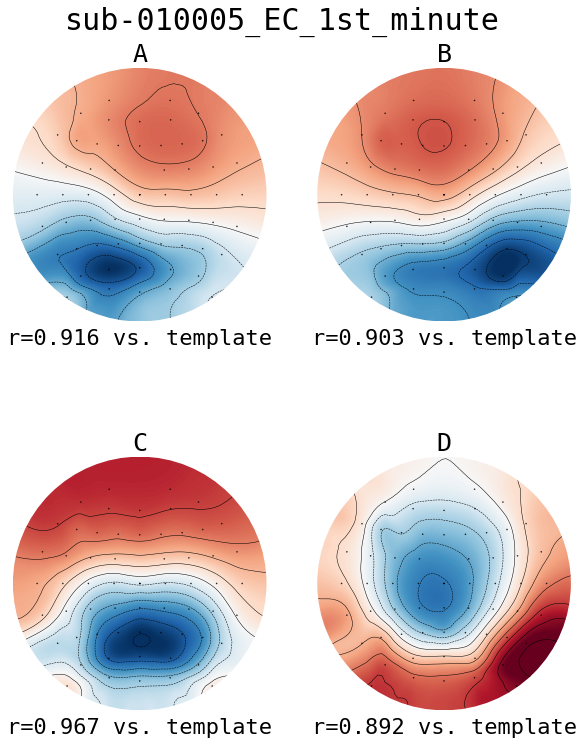

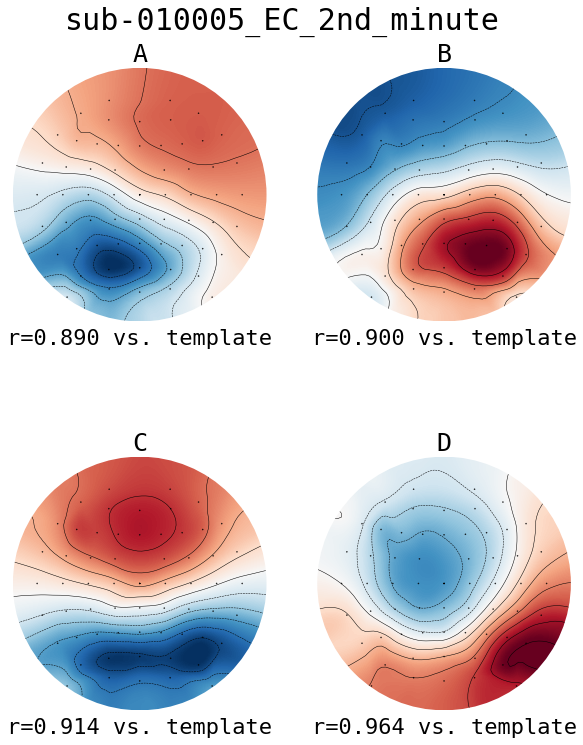

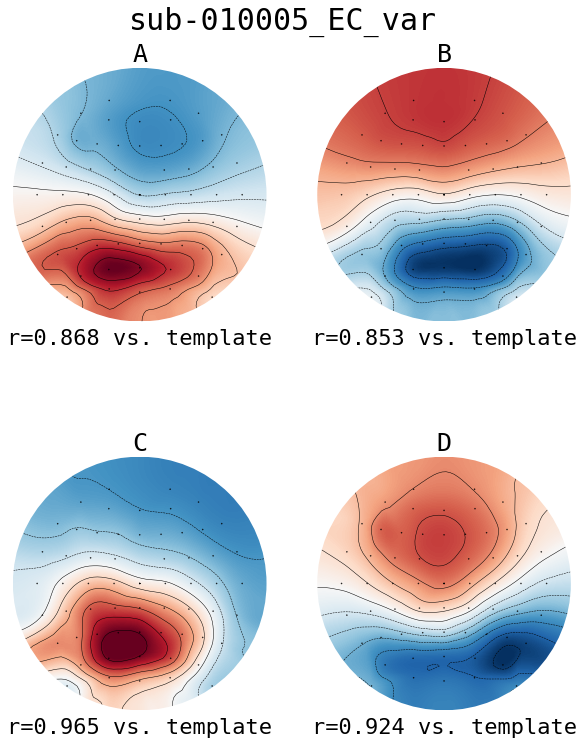

In [11]:
for recording in results:
    recording.save_latent(path="ms_results")
    if "sub-010005" in recording.subject_id:
        plot_eeg_topomaps(
            recording.latent_maps,
            recording.info,
            xlabels=[
                f"r={np.abs(corr):.3f} vs. template"
                for corr in recording.corrs_template
            ],
            title=recording.subject_id,
        )

In [14]:
full_df = pd.concat(
    [recording.get_stats_pandas(write_attrs=True) for recording in results],
    axis=0,
)

In [16]:
full_df.to_csv("ms_results/stats.csv")